## Preprocessing Blood Cell Images

In [1]:
# Load image
import cv2
print(cv2.__file__)
import numpy as np
from matplotlib import pyplot as plt
import glob



/home/user1/.local/lib/python3.6/site-packages/cv2/cv2.cpython-36m-x86_64-linux-gnu.so


#### Upload Image

In [2]:
file_paths = glob.glob("/home/user1/Documents/kaggle-OHN/blood_cell/dataset-master/JPEGImages" + '/**/*.jpg', recursive=True)


In [78]:
image_normal= cv2.imread(file_paths[10], 1)


### View Image --- No editing, contrast

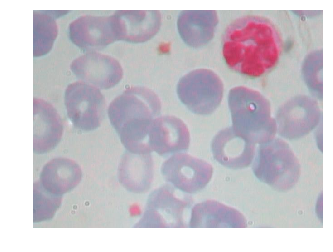

In [65]:
plt.imshow(image_normal), plt.axis("off")
plt.show()

### Enhance Contrast

In [10]:
image_yuv= cv2.cvtColor(image_normal, cv2.COLOR_BGR2YUV)
#if you read in using .imraad with a second parameter "0", theres no need to use cvtColor (it will break/error)
# second parameter '0'= greyscale

#### Enchance image

In [5]:
image_yuv[:,:,0]= cv2.equalizeHist(image_yuv[:,:,0])

#### Convert to RBG

In [6]:
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)


#### View Image

True

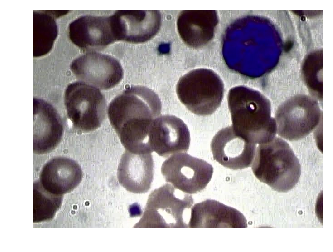

In [53]:
plt.imshow(image_rgb), plt.axis('off')
cv2.imwrite('image_rgb.jpg', image_rgb)

### Edge detection -- NORMAL

#### This works pretty well for this image.... 

87
174


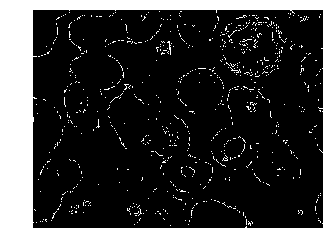

In [8]:
# Calculate median intensity
median_intensity= np.median(image_rgb)



#Set threshold to be one standard deviation above and below median intensity
lower_threshold = int(max(0,(1.0-0.33) * median_intensity))

upper_threshold = int(min(255,(1.0+0.33)* median_intensity))

#Apply canny edge detector
print(lower_threshold)
print(upper_threshold)


image_canny2 = cv2.Canny(image_normal,50,60)
plt.imshow(image_canny2, cmap='gray'),plt.axis("off")
plt.show()


### Edge Detection ---- Contrast

#### This does not work as well.... need to find better values

87
174


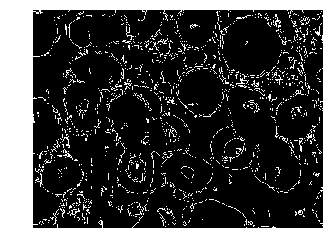

(<matplotlib.image.AxesImage at 0x7fbf480841d0>, (-0.5, 639.5, 479.5, -0.5))

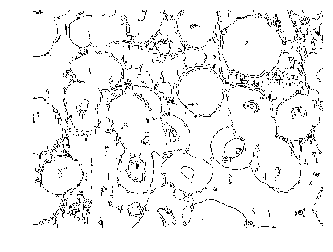

In [43]:
# Calculate median intensity
median_intensity= np.median(image_rgb)



#Set threshold to be one standard deviation above and below median intensity
lower_threshold = int(max(0,(1.0-0.33) * median_intensity))

upper_threshold = int(min(255,(1.0+0.33)* median_intensity))

#Apply canny edge detector
print(lower_threshold)
print(upper_threshold)

#for i in range(100):
   # for g in range(100):
image_canny2 = cv2.Canny(image_rgb,70,170)

plt.imshow(image_canny2, cmap='gray'),plt.axis("off")
plt.show()

cv2.imwrite('contrast_ed.jpg', image_canny2)

imagem = cv2.bitwise_not(image_canny2)
plt.imshow(imagem, cmap='gray'),plt.axis("off")

### Increase Contrast with PIL 

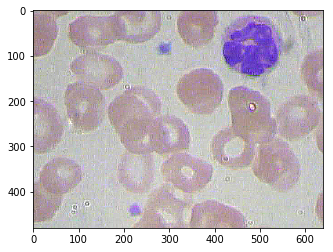

In [11]:
from PIL import Image, ImageFilter
im = Image.open(file_paths[10])
im = im.filter(ImageFilter.EDGE_ENHANCE_MORE)
plt.imshow(im)
plt.show()

### K-Means Image Segmentation 

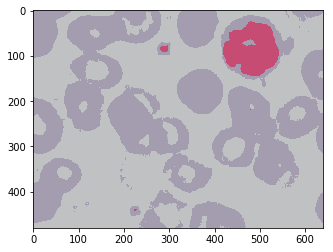

True

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt



img = cv2.imread(file_paths[10])
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.imshow(res2)
plt.show()

cv2.imwrite('res2.jpg', res2)

In [22]:
print(type(res2))
print(type(image_canny2))
print(type(file_paths[0]))

import scipy.misc
print(type(res2))
print(type(image_canny2))
print(type(file_paths[0]))

#res2 = scipy.misc.toimage(res2)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'str'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'str'>


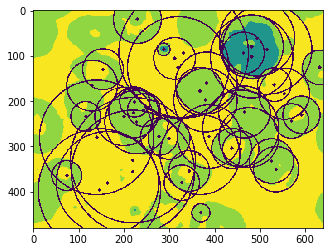

(1, 46, 3)

In [24]:
import cv2
import numpy as np

cimg = cv2.imread('res2.jpg',0)
cimg = cv2.medianBlur(cimg,5)


#cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
plt.show()

#cv2.imshow('detected circles',cimg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

circles.shape

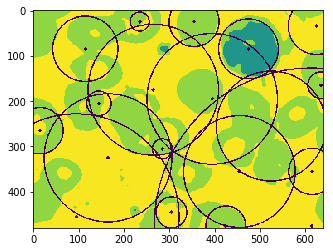

(1, 19, 3)


In [158]:
import cv2
import numpy as np

cimg = cv2.imread('res2.jpg',0)
cimg = cv2.medianBlur(cimg,5)


#cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,10,120,
                            param1=5,param2=20,minRadius=1,maxRadius=0)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
plt.show()

#cv2.imshow('detected circles',cimg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
len(circles)
print(circles.shape)

####

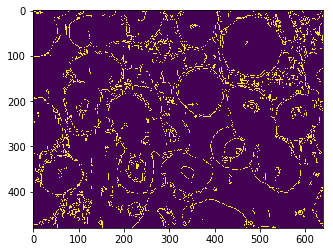

(1, 1, 3)


In [20]:
import cv2
import numpy as np

cimg = cv2.imread('contrast_ed.jpg',0)
#cimg = cv2.medianBlur(cimg,5)


#cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,102,100,
                            param1=20,param2=150,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
plt.show()

len(circles)
print(circles.shape)

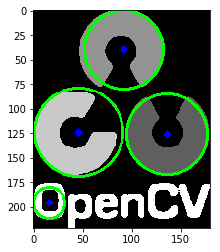

(1, 4, 3)


In [15]:
import cv2
import numpy as np

img = cv2.imread('opencv-logo-white.png',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
plt.show()
print(circles.shape)

87
174
199


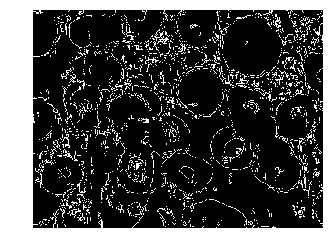

True

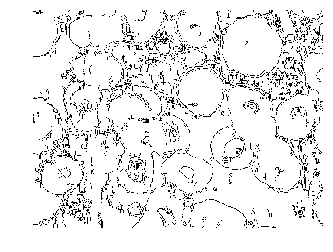

In [47]:
img = cv2.imread('res2.jpg',0)
#median_intensity= np.median(img)



#Set threshold to be one standard deviation above and below median intensity
lower_threshold = int(max(0,(1.0-0.33) * median_intensity))

upper_threshold = int(min(255,(1.0+0.33)* median_intensity))

#Apply canny edge detector
print(lower_threshold)
print(upper_threshold)

#for i in range(100):
   # for g in range(100):
#for i in range(0,200):
image_canny2 = cv2.Canny(image_rgb,40,162)
print(i)
plt.imshow(image_canny2, cmap='gray'),plt.axis("off")
plt.show()

imagem = cv2.bitwise_not(image_canny2)
plt.imshow(imagem, cmap='gray'),plt.axis("off")

cv2.imwrite('contrast_ed2.jpg', image_canny2)
cv2.imwrite('contrast_ed3.jpg', imagem)

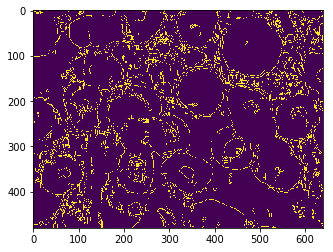

(1, 15, 3)


In [49]:
import cv2
import numpy as np

cimg = cv2.imread('contrast_ed2.jpg',0)
#cimg = cv2.medianBlur(cimg,5)


#cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,2,150,
                            param1=5,param2=20,minRadius=1,maxRadius=0)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
plt.show()

#cv2.imshow('detected circles',cimg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
len(circles)
print(circles.shape)

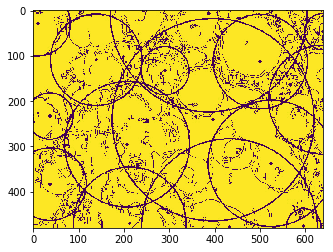

(1, 15, 3)


In [52]:
import cv2
import numpy as np

cimg = cv2.imread('contrast_ed3.jpg',0)
#cimg = cv2.medianBlur(cimg,5)


#cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,2,150,
                            param1=5,param2=20,minRadius=1,maxRadius=0)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
plt.show()

#cv2.imshow('detected circles',cimg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
len(circles)
print(circles.shape)

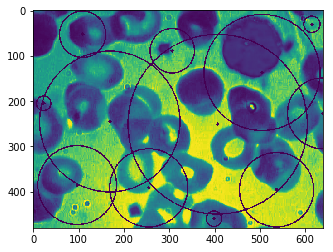

(1, 12, 3)


In [54]:
import cv2
import numpy as np

cimg = cv2.imread('image_rgb.jpg',0)
#cimg = cv2.medianBlur(cimg,5)


#cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,2,150,
                            param1=5,param2=20,minRadius=1,maxRadius=0)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
plt.show()

#cv2.imshow('detected circles',cimg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
len(circles)
print(circles.shape)

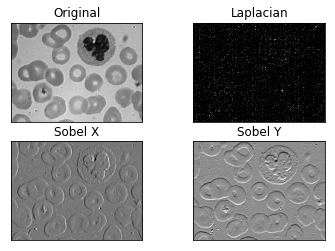

True

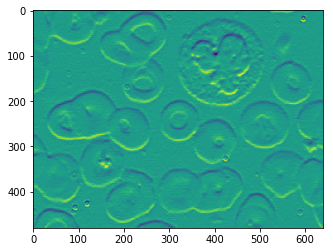

In [85]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(file_paths[8],0)

laplacian = cv2.Laplacian(img,cv2.CV_8U)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()


plt.imshow(sobely)
cv2.imwrite('sobely.jpg', sobely)

51


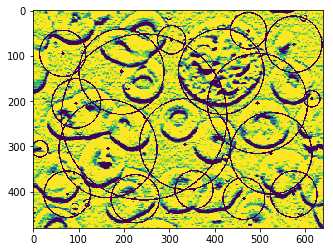

(1, 19, 3)


In [130]:
import cv2
import numpy as np

cimg = cv2.imread('sobely.jpg',0)
cimg = cv2.bitwise_not(cimg)

#cimg = cv2.medianBlur(cimg,5)

#plt.imshow(cimg)
#cimg = cv2.cvtColor(cimg,cv2.COLOR_GRAY2BGR)
#for g in range(1,200):
circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,10,100,param1=1,param2=160,minRadius=1,maxRadius=0)
print(g)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
plt.show()

len(circles)
print(circles.shape)

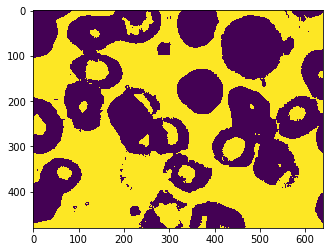

In [24]:
import cv2

im_gray = cv2.imread('res2.jpg',cv2.IMREAD_GRAYSCALE)


(thresh, im_bw) = cv2.threshold(im_gray, 500, 0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
im_binary = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]

plt.imshow(im_binary)
                        
#cv2.imwrite('binary_image.png', im_bw)

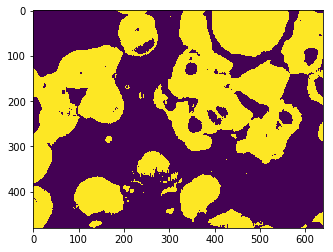

In [46]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(file_paths[0])
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh)

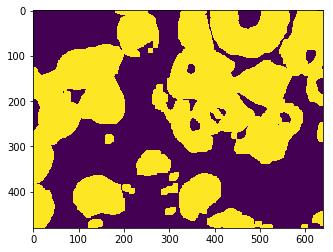

In [47]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

plt.imshow(opening)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.imshow(sure_fg)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(unknown)

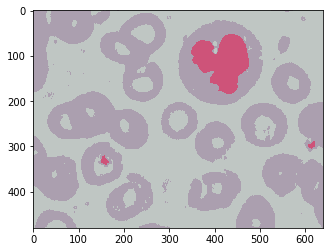

True

In [48]:
import numpy as np
import cv2
from matplotlib import pyplot as plt



img = cv2.imread(file_paths[8])
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.imshow(res2)
plt.show()

cv2.imwrite('res2.jpg', res2)

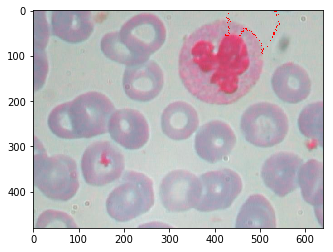

In [49]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(img)

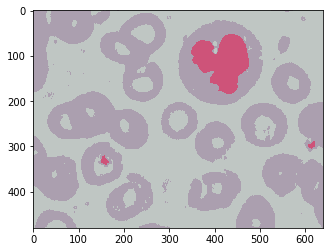

In [51]:
plt.imshow(res2)


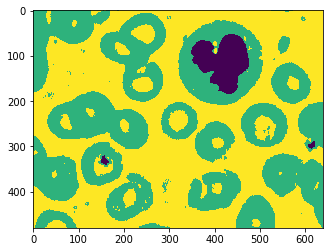

In [58]:
import cv2
im_gray=cv2.cvtColor(res2,cv2.COLOR_BGR2GRAY)
#im_gray = cv2.imread(res2,cv2.IMREAD_GRAYSCALE)
plt.imshow(im_gray)

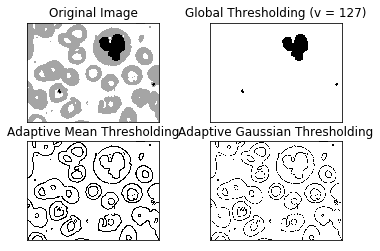

In [118]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.medianBlur(im_gray,5)

ret,th1 = cv2.threshold(img,120,50,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


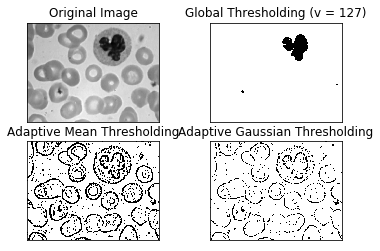

True

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_normal= cv2.imread(file_paths[8], 1)

image_normal=cv2.cvtColor(image_normal,cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(image_normal,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,200,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
cv2.imwrite('th1.jpg', th1)

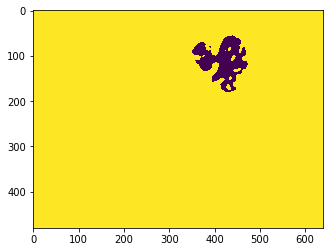

In [24]:
plt.imshow(th1)

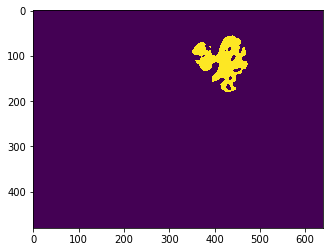

Number of WBCs = 1


In [25]:
import cv2
import numpy as np

cimg = th1
cimg = cv2.bitwise_not(cimg)
#cimg = cv2.medianBlur(cimg,5)

#plt.imshow(cimg)
#cimg = cv2.cvtColor(cimg,cv2.COLOR_GRAY2BGR)
#for g in range(1,200):
circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,4,360,param1=1,param2=200,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
plt.show()

len(circles)
print("Number of WBCs =", circles.shape[1])                                

I found 3 black shapes


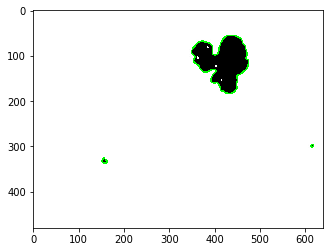

In [51]:
# import the necessary packages
import numpy as np
import argparse
import cv2
#print(cv2.__version__)

 
# load the imagecv2.imread
image_normal= cv2.imread('th1.jpg')
#image_normal = cv2.blur(image_normal,(10,10))


# find all the 'black' shapes in the image
lower = np.array([0, 0, 0])
upper = np.array([150, 150, 150
                 ])
shapeMask = cv2.inRange(image_normal, lower, upper)
# find the contours in the mask
img,cnts, _ = cv2.findContours(shapeMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print ("I found %d black shapes" % (len(cnts)))
cv2.imshow("Mask", shapeMask)
 
# loop over the contours
for c in cnts:
    # draw the contour and show it
    cv2.drawContours(image_normal, [c], -1, (0, 250, 0), 2)
    plt.imshow(image_normal)
    

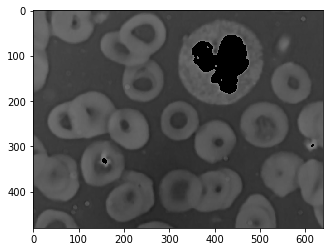

In [52]:
import PIL
th1= cv2.imread('th1.jpg')
img= cv2.imread('img.jpg')



def diff(img,img1): # returns just the difference of the two images
    return cv2.subtract(img,img1)

plt.imshow(
    diff(th1,img))